#### Learning Regression Formulas :
1. Hypothesis : $\widehat{y} = WX + b \Leftrightarrow h_o(x) = \theta_0 + \theta_1(x) $

2. Parameters : $ \theta_0, \theta_1 $ 

3. Cost_function : 
    - MSE $ \Rightarrow J(W,b) = \frac{1}{N}\sum_{i=1}^n (y_i - (W.X_i + b))^2 $
    
    - $J^{'}(W,b) = [\frac{\partial{J}}{\partial{W}}, \frac{\partial{J}}{\partial{b}} ] = [\frac{1}{N}\sum-2.X_i(y_i - (W.X_i + b)) , \frac{1}{N}\sum-2(y_i - (W.X_i + b))]$
    
    
4. Used method :
    - Gradient Descent method:
    - Goal : minimize (b,W or $\theta_0 , \theta_1$)  or we can say : J(b,W) or J($\theta_0 , \theta_1$)
    
    
5. Update Values: 
    - $ W \Rightarrow W - \alpha.\partial{W} $  
        - where $\partial{W} \Rightarrow \frac{\partial{J}}{\partial{W}} $
        
    - $ b \Rightarrow b - \alpha.\partial{b} $ 
        - where $\partial{b} \Rightarrow \frac{\partial{J}}{\partial{b}} $
 
 
6. So partial Weigth and bias are: 
    - $ \frac{\partial{J}}{\partial{W}} \Rightarrow \frac{1}{N} \sum_{i=1}^n 2.X_i (\widehat{y} - y)$
    
    - $ \frac{\partial{J}}{\partial{b}} \Rightarrow \frac{1}{N} \sum_{i=1}^n 2 (\widehat{y} - y)$
    
    
7. Check Error :

    - MSE(Mean_square_error) : $ \frac{1}{N} \sum_{i=1}^N (\widehat{y_i} - y_i)^2 $
    
    - MAE(Mean_absolute_error) : $ \frac{1}{N} \sum_{i=1}^N |\widehat{y_i} - y_i| $
    
    - RMSE(Root_mean_squared_error) : $ \sqrt{\frac{1}{N} \sum_{i=1}^N (\widehat{y_i} - y_i)^2} $

In [1]:
### Import libraries..
import numpy as np
import matplotlib.pyplot as plt

### Use this libraries to generate fake data or we can use other real data also..
from sklearn.datasets import make_regression

In [2]:
### Linear Regression code....

class LinearRegression:
    """
    Copy from original sklearn...
    
    Ordinary least squares Linear Regression.
    
    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.
    
    Parameters
    ----------
    learning_rate : float, default=0.001
        By default the learning rate is 0.001.it is the jump that a done by every step.
        
    n_iters : int, default=1000
        The number of iteration to use for the computation. This will only provide
        speedup for n_targets > 1 and sufficient large problems.

    Attributes
    ----------
    fit: (X,y)
        In fit method pass the feature and target value in the numpy array format.
        
    coef_ : array of shape (n_features, ) or (n_targets, n_features)
        Estimated coefficients for the linear regression problem.
        If multiple targets are passed during the fit (y 2D), this
        is a 2D array of shape (n_targets, n_features), while if only
        one target is passed, this is a 1D array of length n_features.
        
    intercept_ : float or array of shape (n_targets,)
        Independent term in the linear model. Set to 0.0 if
        `fit_intercept = False`.
    
    
    Notes
    -----
    From the implementation point of view, this is just plain Ordinary
    Least Squares wrapped as a predictor object.
    
    Examples
    --------
    >>> import numpy as np
    >>> import LinearRegression
    >>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
    >>> # y = 1 * x_0 + 2 * x_1 + 3
    >>> y = np.dot(X, np.array([1, 2])) + 3
    >>> reg = LinearRegression().fit(X, y)
    >>> reg.score(X, y)
    1.0
    >>> reg.coef_
    array([1., 2.])
    >>> reg.intercept_
    3.0000...
    >>> reg.predict(np.array([[3, 5]]))
    array([16.])
    """    
    def __init__(self,learning_rate=0.001, n_iters=1000):
        'By default the parameter learning_rate=0.001 and iteration = 3000. You can change as your according..'
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        'This method is use for train the model. You can pass the X, y data on this fit method.'
        n_samples, n_features = X.shape
        
        #init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            ## compute gradient 
            dw = (1/n_samples) * np.dot(X.T, (y_predicted-y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        ## return the weights and bias...
        return {'intercept_':self.weights, 'coef_':self.bias}
            
           
    def predict(self,X):
        'This method is use for prediction... You can pass here X_test data..'
        y_approximation = np.dot(X,self.weights) + self.bias
        return y_approximation
    
    def mean_Square_Error(self, y_true, y_pred):
        'Check Mean Square Error'
        return np.mean((y_pred-y_true)**2)
    
    def mean_Absolute_Error(self, y_true, y_pred):
        'Check Mean Absolute Error'
        return np.mean(abs(y_pred-y_true))
    
    def root_Mean_Squared_Error(self, y_true, y_pred):
        'Check Root Mean Squared Error'
        return np.sqrt(np.mean((y_pred-y_true)**2))
    
    

In [3]:
# create the independent and dependent variable..
X, y = make_regression(n_samples= 500, n_features=1,noise=20,random_state=1)

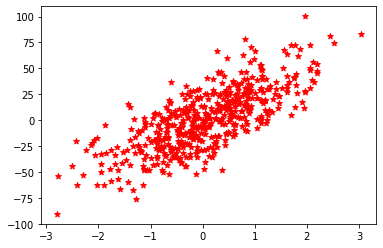

In [4]:
## visulization the data using scatter plot
plt.scatter(X,y,c='red',marker='*')

In [5]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

In [6]:
## see the data values
X[:5], y[:5]

(array([[-0.19183555],
        [-0.53722302],
        [ 0.56438286],
        [ 1.93752881],
        [ 1.20205486]]),
 array([-18.3612167 ,   8.57649265,  19.34410051,  12.01935862,
          9.36500569]))

In [7]:
X_train[:5], y_train[:5]

(array([[ 0.40349164],
        [-0.74996962],
        [ 0.87616892],
        [ 1.12141771],
        [-0.59384307]]),
 array([ 42.97379612, -25.28955888,  10.77555026,   1.69364758,
         -4.51191957]))

In [8]:
## check length
len(X_train), len(y_train), len(X_test), len(y_test)

(375, 375, 125, 125)

In [9]:
### create a model object...
regressor= LinearRegression(n_iters=3000)

## train the model 
regressor.fit(X_train, y_train) 
# return the weigth and bias

{'intercept_': array([21.71654479]), 'coef_': 0.12400569176524708}

In [10]:
## check prediction for training dataset
x_pred = regressor.predict(X_train)

## check prediction for testing dataset
y_pred = regressor.predict(X_test)

In [11]:
## See the values
y_pred[:5], y_test[:5]

(array([-26.73617606, -46.40296899,  39.96773321,  18.99321084,
        -17.90445946]),
 array([-23.99707863, -23.58153606,  61.58426006,  34.79018308,
        -28.42018903]))

In [12]:
## check the Error rate..
print(regressor.mean_Square_Error(y_test, y_pred))
print(regressor.mean_Absolute_Error(y_test, y_pred))
print(regressor.root_Mean_Squared_Error(y_test, y_pred))

331.9722607850855
14.669669831275108
18.220105948788703


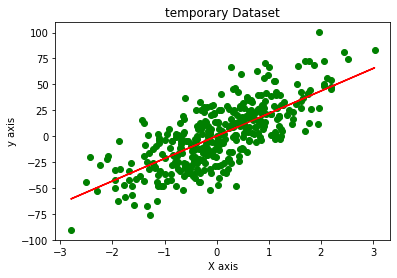

In [13]:
### plot for training dataset
plt.scatter(X_train, y_train, color="green")   
plt.plot(X_train, x_pred, color="red")    
plt.title("temporary Dataset")  
plt.xlabel("X axis")  
plt.ylabel("y axis")  
plt.show()

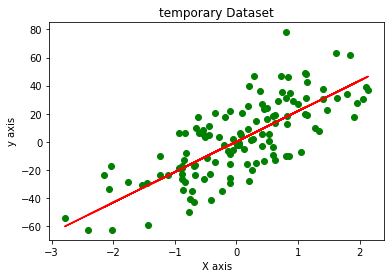

In [14]:
### plot for testing dataset
plt.scatter(X_test, y_test, color="green")   
plt.plot(X_test, y_pred, color="red")    
plt.title("temporary Dataset")  
plt.xlabel("X axis")  
plt.ylabel("y axis") 
plt.show()

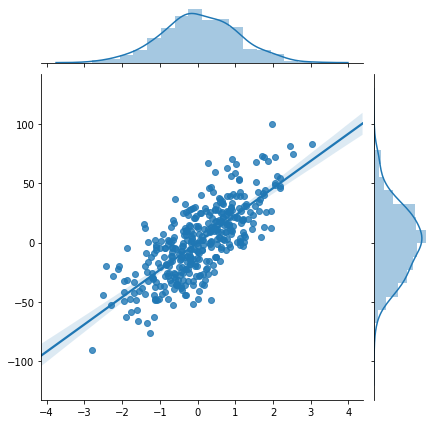

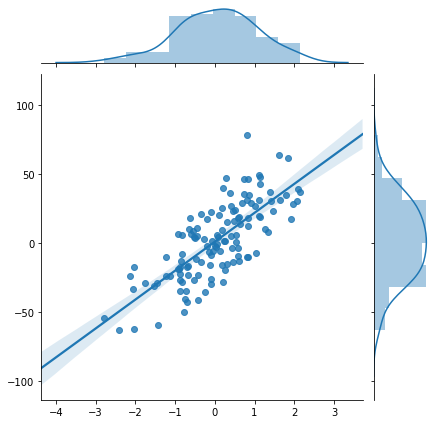

In [15]:
## check the best fit line for training and testing using joinplot method
import seaborn as sns
sns.jointplot(X_train.flatten(),y_train,kind='reg')
plt.show()
sns.jointplot(X_test.flatten(),y_test,kind='reg')
plt.show()

#### Try for the real world data

In [16]:
import pandas as pd

In [17]:
df = pd.read_excel('slr02.xls')
df

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [18]:
X = np.array(df.X)
y = np.array(df.Y)
X.shape

(15,)

In [19]:
### Reshape is required otherwise get error
X = np.reshape(X,(len(X),1))
X.shape

(15, 1)

In [20]:
## Create the model
regressor= LinearRegression(learning_rate=0.0001)
## train the model
# regressor.fit(X_train,y_train)
regressor.fit(X,y)

{'intercept_': array([4.77335359]), 'coef_': 0.30794940041102353}

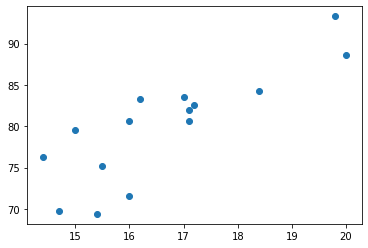

In [21]:
## Visulizing the data
plt.scatter(X,y)

In [22]:
## Check the prediction
y_pred = regressor.predict(X)
y_pred,y

(array([95.77502111, 76.68160677, 94.82034677, 88.13765356, 81.93229753,
        74.29492998, 70.4762462 , 81.93229753, 73.81759281, 77.63628112,
        71.90825318, 82.4096347 , 76.68160677, 81.45496036, 69.04423922]),
 array([88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
        75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
        79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305]))

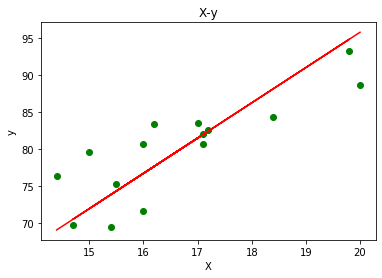

In [23]:
### plot for training dataset
plt.scatter(X, y, color="green")   
plt.plot(X, y_pred, color="red")    
plt.title("X-y")  
plt.xlabel("X")  
plt.ylabel("y")  
plt.show()

In [24]:
## check the Error rate..
print(regressor.mean_Square_Error(y, y_pred))
print(regressor.mean_Absolute_Error(y, y_pred))
print(regressor.root_Mean_Squared_Error(y, y_pred))

18.701209666405287
3.4585706910771763
4.324489526684657


### Observation : 

1. If we want to get more accurate result the we need to choose right value of learning rate and no. of iteration.
2. When I writing this code Main error i'm faceing that the shape of data is metter alot because many times error come when the data is not according to the code algorithm.. 